In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
include("src/spiking.jl")
include("src/vsa.jl")

similarity_outer (generic function with 2 methods)

In [3]:
using Plots

In [4]:
n_x = 101
n_y = 101
n_vsa = 1

1

In [5]:
repeats = 6

6

In [6]:
phase_x = reshape(range(-1.0, 1.0, n_x), (1, n_x, n_vsa)) |> collect
phase_y = reshape(range(-1.0, 1.0, n_y), (1, n_y, n_vsa)) |> collect

1×101×1 Array{Float64, 3}:
[:, :, 1] =
 -1.0  -0.98  -0.96  -0.94  -0.92  -0.9  …  0.9  0.92  0.94  0.96  0.98  1.0

In [7]:
sims = similarity_outer(phase_x, phase_y, 2)[1,1,:,:]

101×101 Matrix{Float64}:
 1.0       0.998027  0.992115  0.982287  …  0.992115  0.998027  1.0
 0.998027  1.0       0.998027  0.992115     0.982287  0.992115  0.998027
 0.992115  0.998027  1.0       0.998027     0.968583  0.982287  0.992115
 0.982287  0.992115  0.998027  1.0          0.951057  0.968583  0.982287
 0.968583  0.982287  0.992115  0.998027     0.929776  0.951057  0.968583
 0.951057  0.968583  0.982287  0.992115  …  0.904827  0.929776  0.951057
 0.929776  0.951057  0.968583  0.982287     0.876307  0.904827  0.929776
 0.904827  0.929776  0.951057  0.968583     0.844328  0.876307  0.904827
 0.876307  0.904827  0.929776  0.951057     0.809017  0.844328  0.876307
 0.844328  0.876307  0.904827  0.929776     0.770513  0.809017  0.844328
 ⋮                                       ⋱                      ⋮
 0.876307  0.844328  0.809017  0.770513     0.929776  0.904827  0.876307
 0.904827  0.876307  0.844328  0.809017     0.951057  0.929776  0.904827
 0.929776  0.904827  0.876307  0.84432

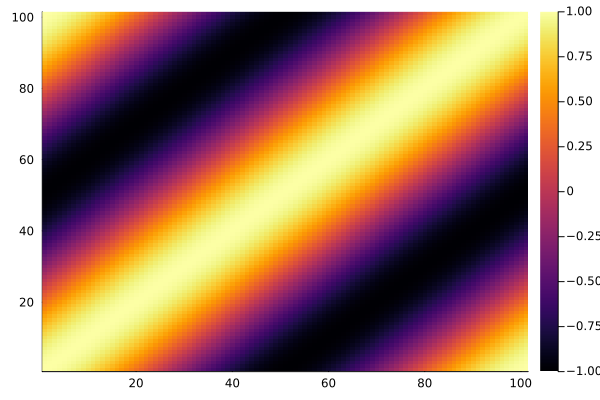

In [8]:
heatmap(sims)

In [9]:
spk_args = default_spk_args()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [10]:
tspan = (0.0, repeats*1.0)

(0.0, 6.0)

In [11]:
st_x = phase_to_train(phase_x, spk_args, repeats = repeats)
st_y = phase_to_train(phase_y, spk_args, repeats = repeats)

Spike Train: (1, 101, 1) with 606 spikes.

In [12]:
sims_2 = similarity_outer(st_x, st_y, dims=2, tspan=tspan);

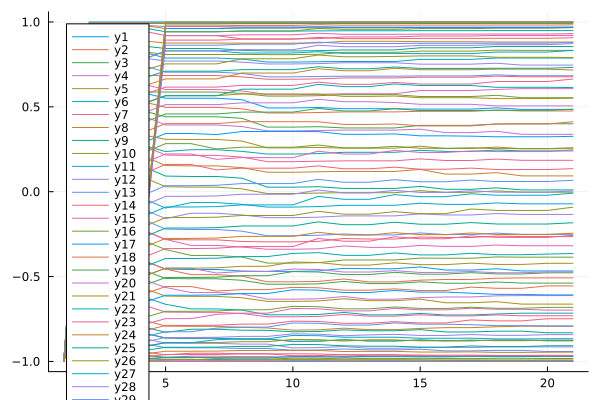

In [13]:
plot(sims_2[1,1,1:30:end,1,:])

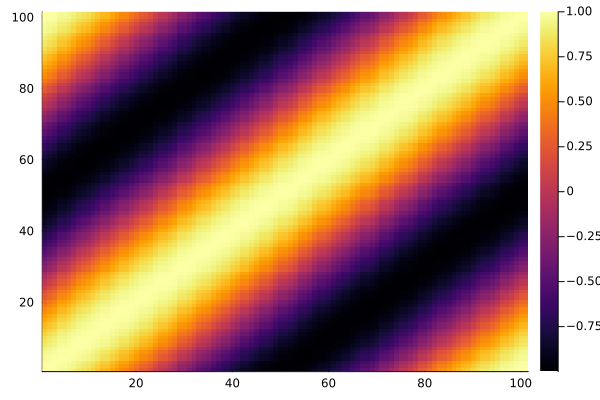

In [14]:
heatmap(sims_2[1,1,end,:,:])

In [15]:
using StatsPlots: density

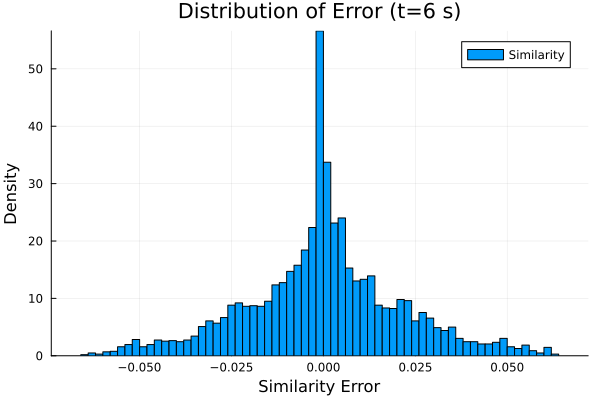

In [23]:
fig = histogram((vec(sims_2[1,1,end,:,:] .- sims)), label="Similarity", normalize=:pdf)
xlabel!("Similarity Error")
ylabel!("Density")
title!("Distribution of Error (t=6 s)")

In [24]:
png(fig, "sim phase error.png")

"sim phase error.png"

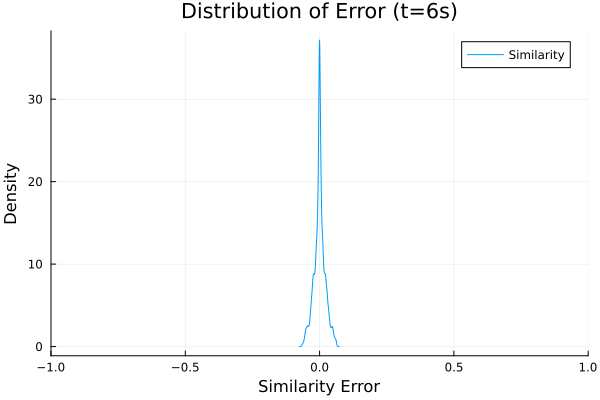

In [28]:
fig = density((vec(sims_2[1,1,end,:,:] .- sims)), label="Similarity", xlims=(-1, 1))
xlabel!("Similarity Error")
ylabel!("Density")
title!("Distribution of Error (t=6s)")

In [29]:
png(fig, "sim error density.png")

"sim error density.png"